In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns

import os
import re
import html as ihtml

import pandas as pd
from bs4 import BeautifulSoup

import string
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
from wordcloud import WordCloud
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv("gdrive/My Drive/dataset.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data['total_text'] = data['question'] + " " + data['answer']
data

question  \
0               What is supervised machine learning? 👶   
1    What is regression? Which models can you use t...   
2      What is linear regression? When do we use it? 👶   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                                answer  \
0    Supervised learning is a type of machine learn...   
1    Regression is a part of supervised ML. Regress...   
2    Linear regression is a model that assumes a li...   
3    There are several assumptions of linear regres...   
4    The normal distribution is a continuous probab...   
..                                                 ...   
161  * Simple Exponential Smoothing: approximate th...   
162  We can explicitly model the trend (and/or seas...   
163  We want to look at the correlation between dif...   
164  Given the assumption that the set of features ...   
165  Random Forest models are not able to extrapola...   

                                            total_text  
0    What is supervised machine learning? 👶 Supervi...  
1    What is regression? Which models can you use t...  
2    What is linear regression? When do we use it? ...  
3    What are the main assumptions of linear regres...  
4    What’s the normal distribution? Why do we care...  
..                                                 ...  
161  Which models do you know for solving time seri...  
162  If there’s a trend in our series, how we can r...  
163  You have a series with only one variable “y” m...  
164  You have a series with a variable “y” and a se...  
165  What are the problems with using trees for sol...  

[166 rows x 3 columns]

In [ ]:
data['total_text_clean'] = data['total_text'].str.lower()
data

question  \
0               What is supervised machine learning? 👶   
1    What is regression? Which models can you use t...   
2      What is linear regression? When do we use it? 👶   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                                answer  \
0    Supervised learning is a type of machine learn...   
1    Regression is a part of supervised ML. Regress...   
2    Linear regression is a model that assumes a li...   
3    There are several assumptions of linear regres...   
4    The normal distribution is a continuous probab...   
..                                                 ...   
161  * Simple Exponential Smoothing: approximate th...   
162  We can explicitly model the trend (and/or seas...   
163  We want to look at the correlation between dif...   
164  Given the assumption that the set of features ...   
165  Random Forest models are not able to extrapola...   

                                            total_text  \
0    What is supervised machine learning? 👶 Supervi...   
1    What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? ...   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                      total_text_clean  
0    what is supervised machine learning? 👶 supervi...  
1    what is regression? which models can you use t...  
2    what is linear regression? when do we use it? ...  
3    what are the main assumptions of linear regres...  
4    what’s the normal distribution? why do we care...  
..                                                 ...  
161  which models do you know for solving time seri...  
162  if there’s a trend in our series, how we can r...  
163  you have a series with only one variable “y” m...  
164  you have a series with a variable “y” and a se...  
165  what are the problems with using trees for sol...  

[166 rows x 4 columns]

In [ ]:
null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

                  count
question              0
answer                0
total_text            0
total_text_clean      0


In [ ]:
def clean_text(text):
    text = BeautifulSoup(ihtml.unescape(text), "lxml").text
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"\s+", " ", text)
    return text
clean_text(data.loc[165, "total_text_clean"])

'what are the problems with using trees for solving time series problems? \u200d⭐️ random forest models are not able to extrapolate time series data and understand increasing/decreasing trends. it will provide us with average data points if the validation data has values greater than the training data points.'

In [ ]:
data["total_text_clean"] = data["total_text_clean"].apply(lambda x: clean_text(x))
data

<ipython-input-11-9a9bea20f6ff>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(ihtml.unescape(text), "lxml").text


question  \
0               What is supervised machine learning? 👶   
1    What is regression? Which models can you use t...   
2      What is linear regression? When do we use it? 👶   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                                answer  \
0    Supervised learning is a type of machine learn...   
1    Regression is a part of supervised ML. Regress...   
2    Linear regression is a model that assumes a li...   
3    There are several assumptions of linear regres...   
4    The normal distribution is a continuous probab...   
..                                                 ...   
161  * Simple Exponential Smoothing: approximate th...   
162  We can explicitly model the trend (and/or seas...   
163  We want to look at the correlation between dif...   
164  Given the assumption that the set of features ...   
165  Random Forest models are not able to extrapola...   

                                            total_text  \
0    What is supervised machine learning? 👶 Supervi...   
1    What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? ...   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                      total_text_clean  
0    what is supervised machine learning? 👶 supervi...  
1    what is regression? which models can you use t...  
2    what is linear regression? when do we use it? ...  
3    what are the main assumptions of linear regres...  
4    what’s the normal distribution? why do we care...  
..                                                 ...  
161  which models do you know for solving time seri...  
162  if there’s a trend in our series, how we can r...  
163  you have a series with only one variable “y” m...  
164  you have a series with a variable “y” and a se...  
165  what are the problems with using trees for sol...  

[166 rows x 4 columns]

In [ ]:
print(data["total_text_clean"][9])

what is the normal equation? ‍⭐️ normal equations are equations obtained by setting equal to zero the partial derivatives of the sum of squared errors (least squares); normal equations allow one to estimate the parameters of a multiple linear regression.


## Remove Punctuations

In [ ]:
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, ' ')
    return text

data["total_text_clean"] = data["total_text_clean"].apply(remove_punctuations)

In [ ]:
def remove_non_ascii(text):

    return re.sub(r'[^\x00-\x7f]',r'', text)

In [ ]:
data["total_text_clean"] = data["total_text_clean"].apply(lambda x: remove_non_ascii(x))

In [ ]:
def clean_num(text):
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation])
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

In [ ]:
data["total_text_clean"] = data["total_text_clean"].apply(lambda x: clean_num(x))
data

question  \
0               What is supervised machine learning? 👶   
1    What is regression? Which models can you use t...   
2      What is linear regression? When do we use it? 👶   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                                answer  \
0    Supervised learning is a type of machine learn...   
1    Regression is a part of supervised ML. Regress...   
2    Linear regression is a model that assumes a li...   
3    There are several assumptions of linear regres...   
4    The normal distribution is a continuous probab...   
..                                                 ...   
161  * Simple Exponential Smoothing: approximate th...   
162  We can explicitly model the trend (and/or seas...   
163  We want to look at the correlation between dif...   
164  Given the assumption that the set of features ...   
165  Random Forest models are not able to extrapola...   

                                            total_text  \
0    What is supervised machine learning? 👶 Supervi...   
1    What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? ...   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                      total_text_clean  
0    what is supervised machine learning supervised...  
1    what is regression which models can you use to...  
2    what is linear regression when do we use it li...  
3    what are the main assumptions of linear regres...  
4    what is the normal distribution why do we care...  
..                                                 ...  
161  which models do you know for solving time seri...  
162  if there is a trend in our series how we can r...  
163  you have a series with only one variable y mea...  
164  you have a series with a variable y and a set ...  
165  what are the problems with using trees for sol...  

[166 rows x 4 columns]

In [ ]:
def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  {
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",
                            "gawx": "georgia weather",
                            "scwx": "south carolina weather",
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }


        # Some common abbreviations
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk",
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart",
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet",
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously",
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }

        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')

        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)

        return text

In [ ]:
test_text = """
            brb with some sample ph0tos I lov u. I need some $ for 2mw.
            """
print("Test: ", other_clean(test_text))

data["total_text_clean"] = data["total_text_clean"].apply(lambda x: other_clean(x))


Test:  
            be right back with some sample photos I lov you. I need some  dollar  for tomorrow.
            


### Tokenization

In [ ]:
nltk.download('punkt_tab')

data['tokenized'] = data['total_text_clean'].apply(word_tokenize)
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


question  \
0             What is supervised machine learning? 👶   
1  What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? 👶   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                              answer  \
0  Supervised learning is a type of machine learn...   
1  Regression is a part of supervised ML. Regress...   
2  Linear regression is a model that assumes a li...   
3  There are several assumptions of linear regres...   
4  The normal distribution is a continuous probab...   

                                          total_text  \
0  What is supervised machine learning? 👶 Supervi...   
1  What is regression? Which models can you use t...   
2  What is linear regression? When do we use it? ...   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                    total_text_clean  \
0  what is supervised machine learning supervised...   
1  what is regression which models can you use to...   
2  what is linear regression when do we use it li...   
3  what are the main assumptions of linear regres...   
4  what is the normal distribution why do we care...   

                                           tokenized  
0  [what, is, supervised, machine, learning, supe...  
1  [what, is, regression, which, models, can, you...  
2  [what, is, linear, regression, when, do, we, u...  
3  [what, are, the, main, assumptions, of, linear...  
4  [what, is, the, normal, distribution, why, do,...

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
data['stopwords_removed'] = data['tokenized'].apply(lambda x: [word for word in x if word not in stop])
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


question  \
0             What is supervised machine learning? 👶   
1  What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? 👶   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                              answer  \
0  Supervised learning is a type of machine learn...   
1  Regression is a part of supervised ML. Regress...   
2  Linear regression is a model that assumes a li...   
3  There are several assumptions of linear regres...   
4  The normal distribution is a continuous probab...   

                                          total_text  \
0  What is supervised machine learning? 👶 Supervi...   
1  What is regression? Which models can you use t...   
2  What is linear regression? When do we use it? ...   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                    total_text_clean  \
0  what is supervised machine learning supervised...   
1  what is regression which models can you use to...   
2  what is linear regression when do we use it li...   
3  what are the main assumptions of linear regres...   
4  what is the normal distribution why do we care...   

                                           tokenized  \
0  [what, is, supervised, machine, learning, supe...   
1  [what, is, regression, which, models, can, you...   
2  [what, is, linear, regression, when, do, we, u...   
3  [what, are, the, main, assumptions, of, linear...   
4  [what, is, the, normal, distribution, why, do,...   

                                   stopwords_removed  
0  [supervised, machine, learning, supervised, le...  
1  [regression, models, use, solve, regression, p...  
2  [linear, regression, use, linear, regression, ...  
3  [main, assumptions, linear, regression, severa...  
4  [normal, distribution, care, normal, distribut...

### Stemming

In [ ]:
def porter_stemmer(text):

    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

In [ ]:
data['porter_stemmer'] = data['stopwords_removed'].apply(lambda x: porter_stemmer(x))
data.head()

question  \
0             What is supervised machine learning? 👶   
1  What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? 👶   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                              answer  \
0  Supervised learning is a type of machine learn...   
1  Regression is a part of supervised ML. Regress...   
2  Linear regression is a model that assumes a li...   
3  There are several assumptions of linear regres...   
4  The normal distribution is a continuous probab...   

                                          total_text  \
0  What is supervised machine learning? 👶 Supervi...   
1  What is regression? Which models can you use t...   
2  What is linear regression? When do we use it? ...   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                    total_text_clean  \
0  what is supervised machine learning supervised...   
1  what is regression which models can you use to...   
2  what is linear regression when do we use it li...   
3  what are the main assumptions of linear regres...   
4  what is the normal distribution why do we care...   

                                           tokenized  \
0  [what, is, supervised, machine, learning, supe...   
1  [what, is, regression, which, models, can, you...   
2  [what, is, linear, regression, when, do, we, u...   
3  [what, are, the, main, assumptions, of, linear...   
4  [what, is, the, normal, distribution, why, do,...   

                                   stopwords_removed  \
0  [supervised, machine, learning, supervised, le...   
1  [regression, models, use, solve, regression, p...   
2  [linear, regression, use, linear, regression, ...   
3  [main, assumptions, linear, regression, severa...   
4  [normal, distribution, care, normal, distribut...   

                                      porter_stemmer  
0  [supervis, machin, learn, supervis, learn, typ...  
1  [regress, model, use, solv, regress, problem, ...  
2  [linear, regress, use, linear, regress, model,...  
3  [main, assumpt, linear, regress, sever, assump...  
4  [normal, distribut, care, normal, distribut, c...

### Part of Speech Tagging (POS Tagging):

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('brown')

wordnet_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV
}

train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text):

    pos_tagged_text = t2.tag(text)
    pos_tagged_text = [
        (word, wordnet_map.get(pos_tag[0], wordnet.NOUN))
        for word, pos_tag in pos_tagged_text
    ]
    return pos_tagged_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
pos_tag_wordnet(data['stopwords_removed'][3])

[('main', 'a'),
 ('assumptions', 'n'),
 ('linear', 'n'),
 ('regression', 'n'),
 ('several', 'n'),
 ('assumptions', 'n'),
 ('linear', 'n'),
 ('regression', 'n'),
 ('violated', 'v'),
 ('model', 'n'),
 ('predictions', 'n'),
 ('interpretation', 'n'),
 ('may', 'n'),
 ('worthless', 'n'),
 ('misleading', 'n'),
 ('linear', 'n'),
 ('relationship', 'n'),
 ('features', 'v'),
 ('target', 'n'),
 ('variable', 'n'),
 ('additivity', 'n'),
 ('means', 'v'),
 ('effect', 'n'),
 ('changes', 'n'),
 ('one', 'n'),
 ('features', 'v'),
 ('target', 'n'),
 ('variable', 'n'),
 ('depend', 'v'),
 ('values', 'n'),
 ('features', 'v'),
 ('example', 'n'),
 ('model', 'n'),
 ('predicting', 'n'),
 ('revenue', 'n'),
 ('company', 'n'),
 ('two', 'n'),
 ('features', 'v'),
 ('number', 'n'),
 ('items', 'n'),
 ('sold', 'v'),
 ('number', 'n'),
 ('items', 'n'),
 ('b', 'n'),
 ('sold', 'v'),
 ('company', 'n'),
 ('sells', 'v'),
 ('items', 'n'),
 ('revenue', 'n'),
 ('increases', 'n'),
 ('independent', 'a'),
 ('number', 'n'),
 ('items',

In [ ]:
%time

data['combined_postag_wnet'] = data['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

data.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


question  \
0             What is supervised machine learning? 👶   
1  What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? 👶   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                              answer  \
0  Supervised learning is a type of machine learn...   
1  Regression is a part of supervised ML. Regress...   
2  Linear regression is a model that assumes a li...   
3  There are several assumptions of linear regres...   
4  The normal distribution is a continuous probab...   

                                          total_text  \
0  What is supervised machine learning? 👶 Supervi...   
1  What is regression? Which models can you use t...   
2  What is linear regression? When do we use it? ...   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                    total_text_clean  \
0  what is supervised machine learning supervised...   
1  what is regression which models can you use to...   
2  what is linear regression when do we use it li...   
3  what are the main assumptions of linear regres...   
4  what is the normal distribution why do we care...   

                                           tokenized  \
0  [what, is, supervised, machine, learning, supe...   
1  [what, is, regression, which, models, can, you...   
2  [what, is, linear, regression, when, do, we, u...   
3  [what, are, the, main, assumptions, of, linear...   
4  [what, is, the, normal, distribution, why, do,...   

                                   stopwords_removed  \
0  [supervised, machine, learning, supervised, le...   
1  [regression, models, use, solve, regression, p...   
2  [linear, regression, use, linear, regression, ...   
3  [main, assumptions, linear, regression, severa...   
4  [normal, distribution, care, normal, distribut...   

                                      porter_stemmer  \
0  [supervis, machin, learn, supervis, learn, typ...   
1  [regress, model, use, solv, regress, problem, ...   
2  [linear, regress, use, linear, regress, model,...   
3  [main, assumpt, linear, regress, sever, assump...   
4  [normal, distribut, care, normal, distribut, c...   

                                combined_postag_wnet  
0  [(supervised, n), (machine, n), (learning, n),...  
1  [(regression, n), (models, n), (use, v), (solv...  
2  [(linear, n), (regression, n), (use, n), (line...  
3  [(main, a), (assumptions, n), (linear, n), (re...  
4  [(normal, a), (distribution, n), (care, n), (n...

### Lemmatization

In [ ]:
def lemmatize_word(text):

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [ ]:
%time

lemmatizer = WordNetLemmatizer()

data['lemmatize_word_w_pos'] = data['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
data['lemmatize_word_w_pos'] = data['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
data['lemmatize_text'] = [' '.join(map(str, l)) for l in data['lemmatize_word_w_pos']]
data.head()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


question  \
0             What is supervised machine learning? 👶   
1  What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? 👶   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                              answer  \
0  Supervised learning is a type of machine learn...   
1  Regression is a part of supervised ML. Regress...   
2  Linear regression is a model that assumes a li...   
3  There are several assumptions of linear regres...   
4  The normal distribution is a continuous probab...   

                                          total_text  \
0  What is supervised machine learning? 👶 Supervi...   
1  What is regression? Which models can you use t...   
2  What is linear regression? When do we use it? ...   
3  What are the main assumptions of linear regres...   
4  What’s the normal distribution? Why do we care...   

                                    total_text_clean  \
0  what is supervised machine learning supervised...   
1  what is regression which models can you use to...   
2  what is linear regression when do we use it li...   
3  what are the main assumptions of linear regres...   
4  what is the normal distribution why do we care...   

                                           tokenized  \
0  [what, is, supervised, machine, learning, supe...   
1  [what, is, regression, which, models, can, you...   
2  [what, is, linear, regression, when, do, we, u...   
3  [what, are, the, main, assumptions, of, linear...   
4  [what, is, the, normal, distribution, why, do,...   

                                   stopwords_removed  \
0  [supervised, machine, learning, supervised, le...   
1  [regression, models, use, solve, regression, p...   
2  [linear, regression, use, linear, regression, ...   
3  [main, assumptions, linear, regression, severa...   
4  [normal, distribution, care, normal, distribut...   

                                      porter_stemmer  \
0  [supervis, machin, learn, supervis, learn, typ...   
1  [regress, model, use, solv, regress, problem, ...   
2  [linear, regress, use, linear, regress, model,...   
3  [main, assumpt, linear, regress, sever, assump...   
4  [normal, distribut, care, normal, distribut, c...   

                                combined_postag_wnet  \
0  [(supervised, n), (machine, n), (learning, n),...   
1  [(regression, n), (models, n), (use, v), (solv...   
2  [(linear, n), (regression, n), (use, n), (line...   
3  [(main, a), (assumptions, n), (linear, n), (re...   
4  [(normal, a), (distribution, n), (care, n), (n...   

                               lemmatize_word_wo_pos  \
0  [supervised, machine, learning, supervised, le...   
1  [regression, model, use, solve, regression, pr...   
2  [linear, regression, use, linear, regression, ...   
3  [main, assumption, linear, regression, several...   
4  [normal, distribution, care, normal, distribut...   

                                lemmatize_word_w_pos  \
0  [supervised, machine, learning, supervised, le...   
1  [regression, model, use, solve, regression, pr...   
2  [linear, regression, use, linear, regression, ...   
3  [main, assumption, linear, regression, several...   
4  [normal, distribution, care, normal, distribut...   

                                      lemmatize_text  
0  supervised machine learning supervised learnin...  
1  regression model use solve regression problem ...  
2  linear regression use linear regression model ...  
3  main assumption linear regression several assu...  
4  normal distribution care normal distribution c...

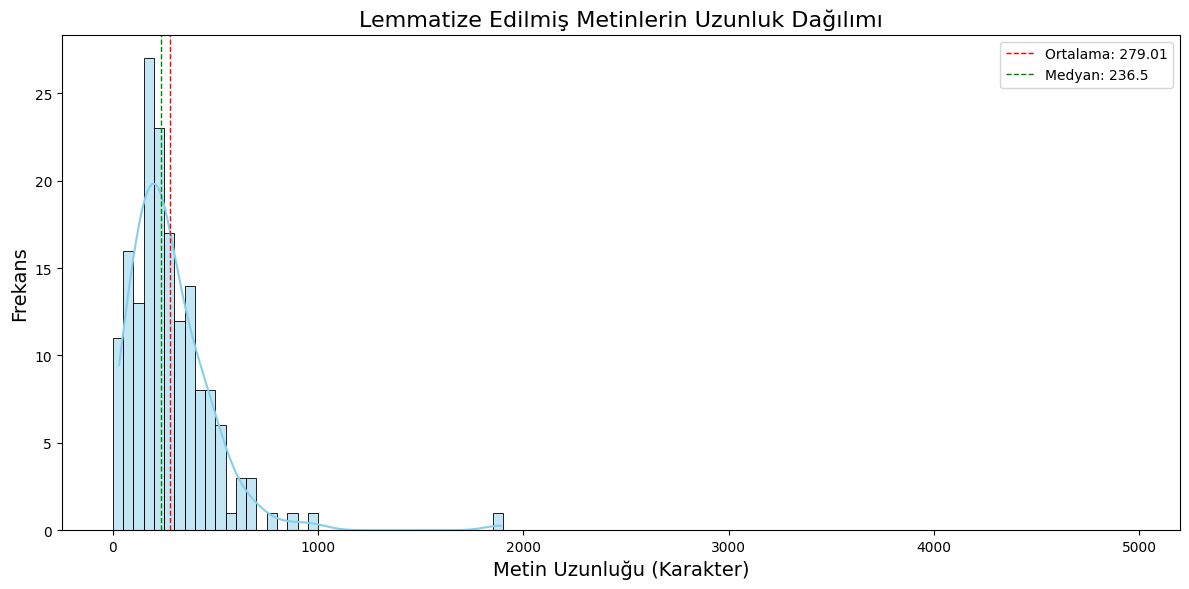

In [ ]:
lens = data['lemmatize_text'].str.len()

plt.figure(figsize=(12, 6))
sns.histplot(lens, bins=np.arange(0, 5000, 50), kde=True, color='skyblue', edgecolor='black')

mean_len = lens.mean()
median_len = lens.median()
plt.axvline(mean_len, color='red', linestyle='dashed', linewidth=1, label=f'Ortalama: {mean_len:.2f}')
plt.axvline(median_len, color='green', linestyle='dashed', linewidth=1, label=f'Medyan: {median_len}')

plt.title('Lemmatize Edilmiş Metinlerin Uzunluk Dağılımı', fontsize=16)
plt.xlabel('Metin Uzunluğu (Karakter)', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
data['text_length'] = data['lemmatize_text'].str.len()

longest_text = data.loc[data['text_length'].idxmax(), 'lemmatize_text']

print("En uzun metin:")
print(longest_text)

En uzun metin:
hyper parameter tuning strategy general know several strategy hyper tuning would argue three popular nowadays follow grid search exhaustive approach hyper parameter user need manually give list value algorithm try value select grid search evaluates algorithm use every combination hyper parameter return combination give optimal result e low mae grid search evaluates give algorithm use combination easy see quite computationally expensive lead sub optimal result specifically since user need specify specific value hyper parameter prone error require domain knowledge random search similar grid search differs sense rather specifying value try hyper parameter upper low bind value hyper parameter give instead uniform probability random value within bound choose similarly best combination return user although seem less intuitive domain knowledge necessary theoretically much parameter space explored completely different framework bayesian optimization think statistical way optimiz

In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=3, stop_words="english")
dtm = tfidf.fit_transform(data['lemmatize_text'])

dtm

<166x367 sparse matrix of type '<class 'numpy.float64'>'
	with 2759 stored elements in Compressed Sparse Row format>

In [ ]:
feature_names = cv.get_feature_names_out()

In [ ]:
NB_TOPICS = 20

LDA_model = LatentDirichletAllocation(n_components = NB_TOPICS,
                                      max_iter = 40, random_state = 1000)

LDA_model.fit(dtm)

LatentDirichletAllocation(max_iter=40, n_components=20, random_state=1000)

In [ ]:
for i, topic in enumerate(LDA_model.components_):
    print(f"TOP 30 WORDS FOR TOPIC #{i + 1}")
    top_words = [cv.get_feature_names_out()[index] for index in topic.argsort()[-30:][::-1]]
    print(", ".join(top_words))
    print("\n")

TOP 30 WORDS FOR TOPIC #1
boost, gradient, tree, classification, problem, logistic, regression, impurity, model, decision, variable, use, possible, importance, criterion, point, answer, feature, know, prediction, come, machine, learn, number, typically, learning, step, binary, cluster, function


TOP 30 WORDS FOR TOPIC #2
error, mean, solve, output, square, problem, matrix, average, use, model, variable, linear, example, regression, value, normalization, select, predictor, small, work, weight, map, good, technique, relatively, change, rating, answer, collaborative, unit


TOP 30 WORDS FOR TOPIC #3
word, text, bag, answer, use, gram, document, information, true, representation, large, simple, good, order, false, actual, negative, positive, specifically, expensive, follow, consecutive, easy, matrix, observation, require, space, hard, complexity, understand


TOP 30 WORDS FOR TOPIC #4
layer, distribution, neuron, time, training, weight, model, certain, series, individual, need, normal, us

In [ ]:
for i, topic in enumerate(LDA_model.components_):
    top_words = [cv.get_feature_names_out()[index] for index in topic.argsort()[-10:][::-1]]
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

Topic #1: boost, gradient, tree, classification, problem, logistic, regression, impurity, model, decision
Topic #2: error, mean, solve, output, square, problem, matrix, average, use, model
Topic #3: word, text, bag, answer, use, gram, document, information, true, representation
Topic #4: layer, distribution, neuron, time, training, weight, model, certain, series, individual
Topic #5: gradient, descent, sgd, adam, learning, function, training, minimum, neural, label
Topic #6: forest, random, feature, point, layer, tree, data, number, learn, density
Topic #7: regularization, model, validation, set, weight, feature, training, coefficient, data, make
Topic #8: recall, precision, object, score, architecture, positive, know, relevant, pr, fast
Topic #9: class, image, classification, cnn, increase, dataset, data, prediction, learning, parameter
Topic #10: word, best, combination, time, neural, vector, augmentation, kind, optimization, method
Topic #11: user, item, auc, normal, need, value, bi

In [ ]:
final_topics = LDA_model.transform(dtm)

print(final_topics.shape)

data["Topic"] = final_topics.argmax(axis=1)

data

(166, 20)


question  \
0               What is supervised machine learning? 👶   
1    What is regression? Which models can you use t...   
2      What is linear regression? When do we use it? 👶   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                                answer  \
0    Supervised learning is a type of machine learn...   
1    Regression is a part of supervised ML. Regress...   
2    Linear regression is a model that assumes a li...   
3    There are several assumptions of linear regres...   
4    The normal distribution is a continuous probab...   
..                                                 ...   
161  * Simple Exponential Smoothing: approximate th...   
162  We can explicitly model the trend (and/or seas...   
163  We want to look at the correlation between dif...   
164  Given the assumption that the set of features ...   
165  Random Forest models are not able to extrapola...   

                                            total_text  \
0    What is supervised machine learning? 👶 Supervi...   
1    What is regression? Which models can you use t...   
2    What is linear regression? When do we use it? ...   
3    What are the main assumptions of linear regres...   
4    What’s the normal distribution? Why do we care...   
..                                                 ...   
161  Which models do you know for solving time seri...   
162  If there’s a trend in our series, how we can r...   
163  You have a series with only one variable “y” m...   
164  You have a series with a variable “y” and a se...   
165  What are the problems with using trees for sol...   

                                      total_text_clean  \
0    what is supervised machine learning supervised...   
1    what is regression which models can you use to...   
2    what is linear regression when do we use it li...   
3    what are the main assumptions of linear regres...   
4    what is the normal distribution why do we care...   
..                                                 ...   
161  which models do you know for solving time seri...   
162  if there is a trend in our series how we can r...   
163  you have a series with only one variable y mea...   
164  you have a series with a variable y and a set ...   
165  what are the problems with using trees for sol...   

                                             tokenized  \
0    [what, is, supervised, machine, learning, supe...   
1    [what, is, regression, which, models, can, you...   
2    [what, is, linear, regression, when, do, we, u...   
3    [what, are, the, main, assumptions, of, linear...   
4    [what, is, the, normal, distribution, why, do,...   
..                                                 ...   
161  [which, models, do, you, know, for, solving, t...   
162  [if, there, is, a, trend, in, our, series, how...   
163  [you, have, a, series, with, only, one, variab...   
164  [you, have, a, series, with, a, variable, y, a...   
165  [what, are, the, problems, with, using, trees,...   

                                     stopwords_removed  \
0    [supervised, machine, learning, supervised, le...   
1    [regression, models, use, solve, regression, p...   
2    [linear, regression, use, linear, regression, ...   
3    [main, assumptions, linear, regression, severa...   
4    [normal, distribution, care, normal, distribut...   
..                                                 ...   
161  [models, know, solving, time, series, problems...   
162  [trend, series, remove, would, want, explicitl...   
163  [series, one, variable, measured, 

In [ ]:
topic_distributions = LDA_model.transform(dtm)
topic_labels = np.argmax(topic_distributions, axis=1)

silhouette_values = silhouette_samples(topic_distributions, topic_labels)

topic_scores = []
for topic_id in range(NB_TOPICS):
    topic_mask = topic_labels == topic_id
    if np.any(topic_mask):
        topic_silhouette = silhouette_values[topic_mask]
        topic_score = np.mean(topic_silhouette)
        topic_scores.append((topic_id + 1, topic_score))

for topic_id, score in topic_scores:
    print(f"Topic #{topic_id} - Silhouette Score: {score:.3f}")

overall_silhouette = silhouette_score(topic_distributions, topic_labels)
print(f"\nOverall Silhouette Score: {overall_silhouette:.3f}")

Topic #1 - Silhouette Score: 0.474
Topic #2 - Silhouette Score: 0.444
Topic #3 - Silhouette Score: 0.650
Topic #4 - Silhouette Score: 0.623
Topic #5 - Silhouette Score: 0.615
Topic #6 - Silhouette Score: 0.490
Topic #7 - Silhouette Score: 0.501
Topic #8 - Silhouette Score: 0.534
Topic #9 - Silhouette Score: 0.550
Topic #10 - Silhouette Score: 0.755
Topic #11 - Silhouette Score: 0.706
Topic #12 - Silhouette Score: 0.792
Topic #13 - Silhouette Score: 0.504
Topic #14 - Silhouette Score: 0.709
Topic #15 - Silhouette Score: 0.986
Topic #16 - Silhouette Score: 0.616
Topic #17 - Silhouette Score: 0.604
Topic #18 - Silhouette Score: 0.682
Topic #19 - Silhouette Score: 0.430
Topic #20 - Silhouette Score: 0.434

Overall Silhouette Score: 0.560


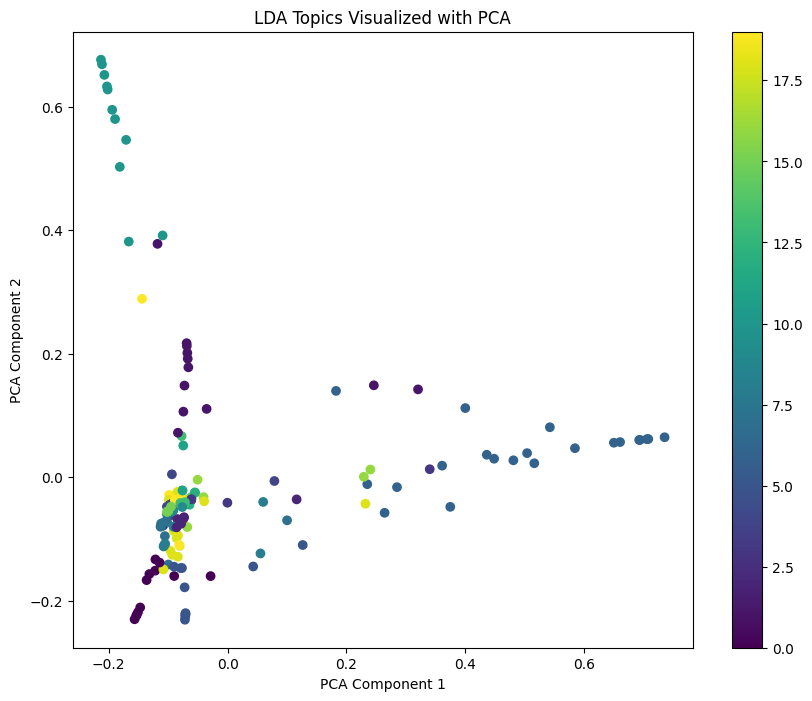

In [ ]:
lda_topic_dist = LDA_model.transform(dtm)

pca = PCA(n_components=2)
lda_topic_pca = pca.fit_transform(lda_topic_dist)

plt.figure(figsize=(10, 8))
plt.scatter(lda_topic_pca[:, 0], lda_topic_pca[:, 1], c=data['Topic'], cmap='viridis')
plt.colorbar()
plt.title('LDA Topics Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
lda_topic_dist = LDA_model.transform(dtm)

tsne_model = TSNE(n_components=2, random_state=42)
lda_topic_tsne = tsne_model.fit_transform(lda_topic_dist)

plt.figure(figsize=(10, 8))
plt.scatter(lda_topic_tsne[:, 0], lda_topic_tsne[:, 1], c=data['Topic'], cmap='viridis')
plt.colorbar()
plt.title('LDA Topics Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

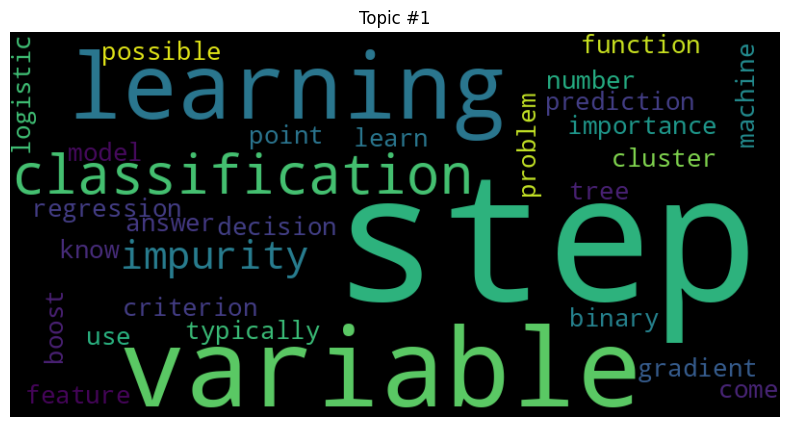

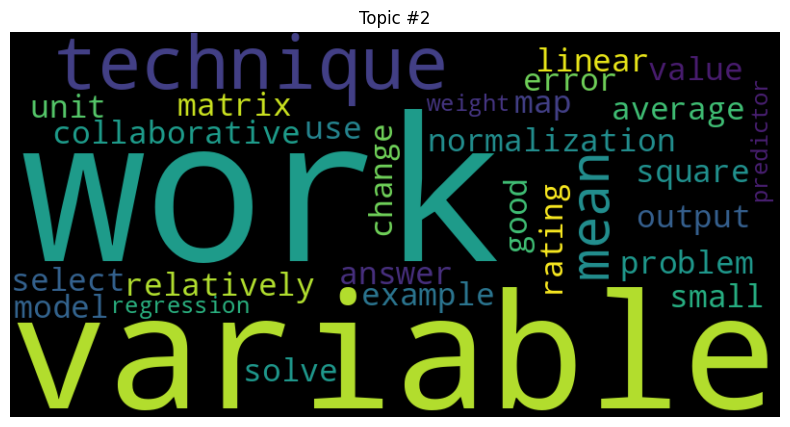

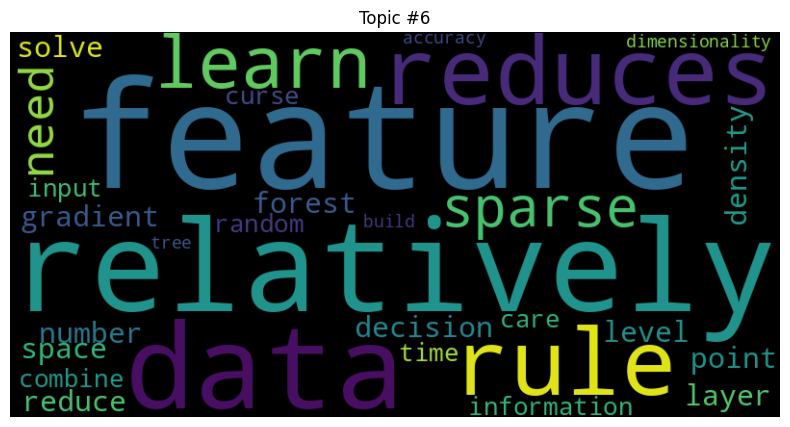

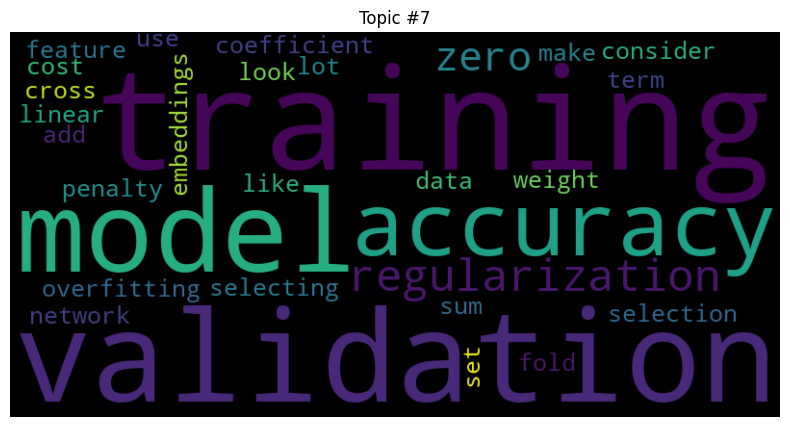

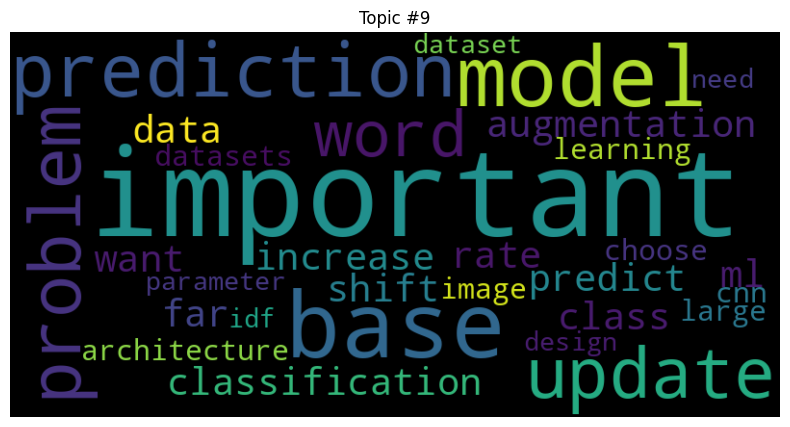

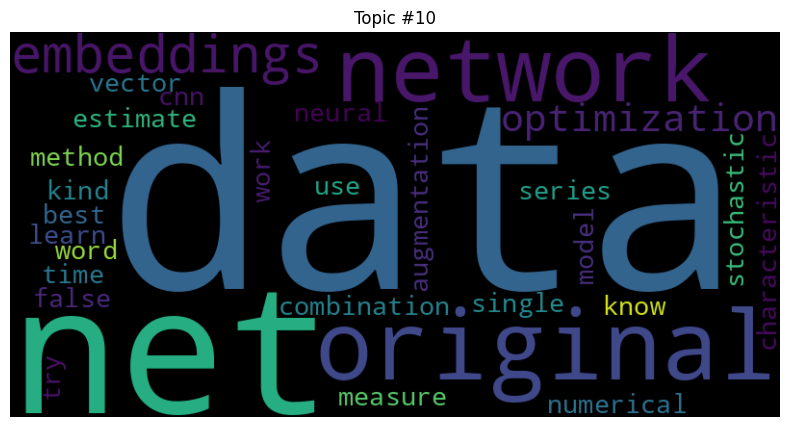

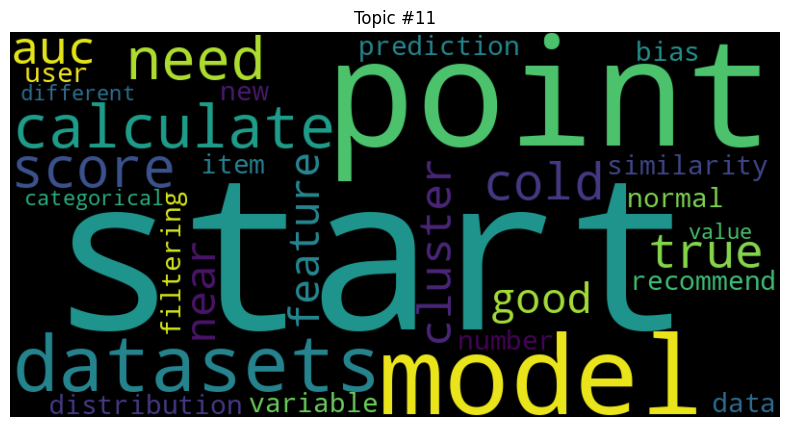

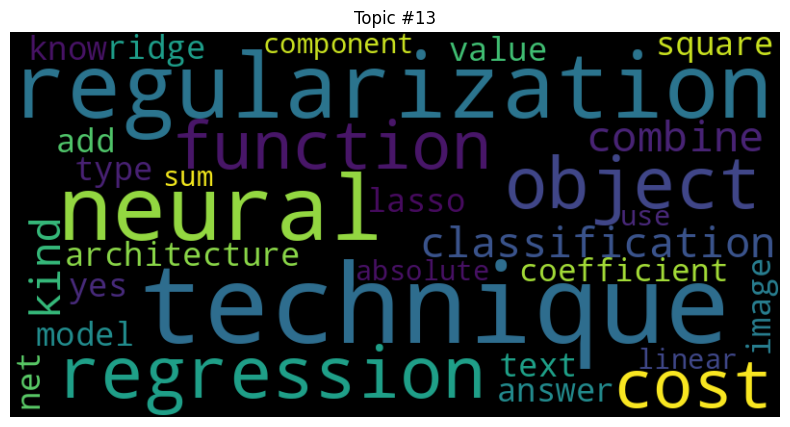

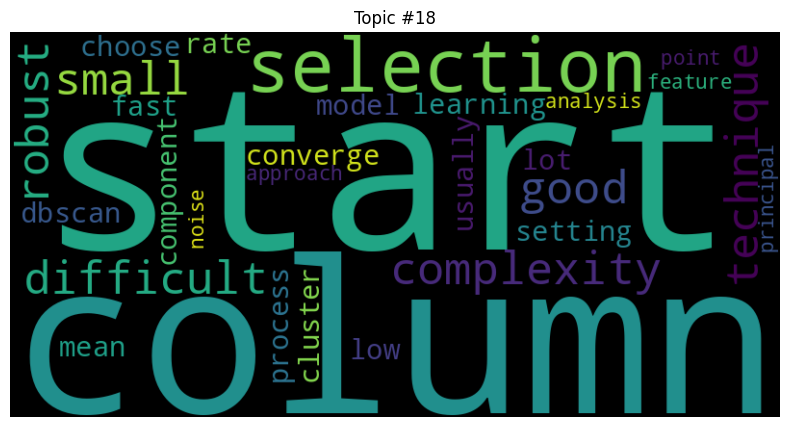

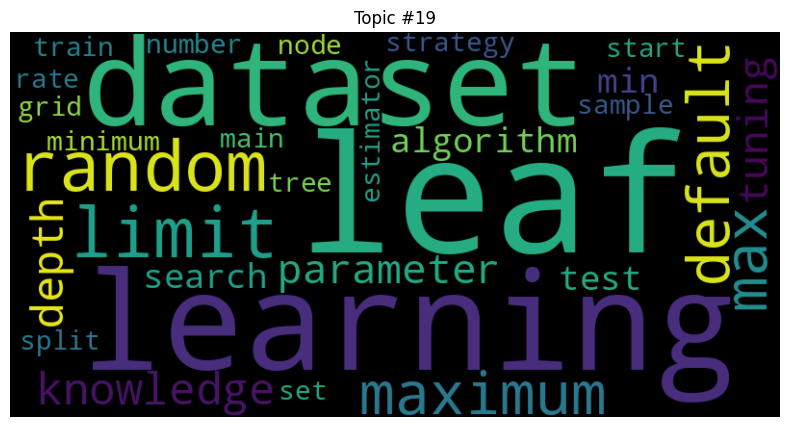

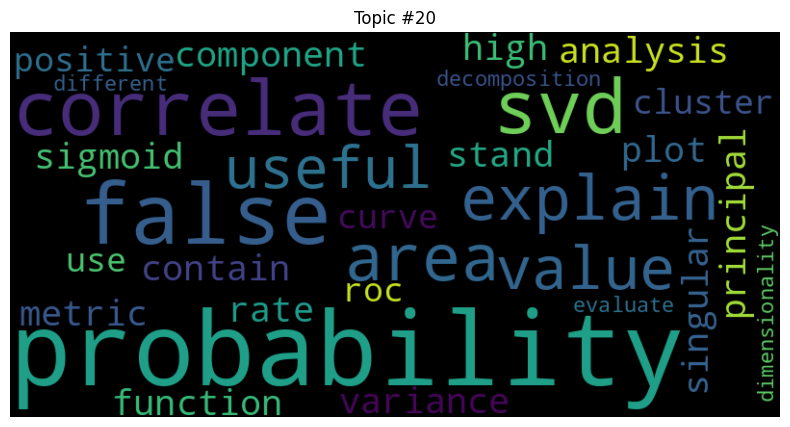

In [ ]:
def generate_wordcloud_for_cluster(topic_id):
    topic = LDA_model.components_[topic_id]
    top_words = [cv.get_feature_names_out()[index] for index in topic.argsort()[-30:][::-1]]

    word_frequencies = {word: topic[index] for index, word in enumerate(top_words)}

    if len(word_frequencies) == 0:
        print(f"Topic #{topic_id} has no words to plot.")
        return

    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{topic_id + 1}")
    plt.show()

for i in range(NB_TOPICS):
    generate_wordcloud_for_cluster(i)

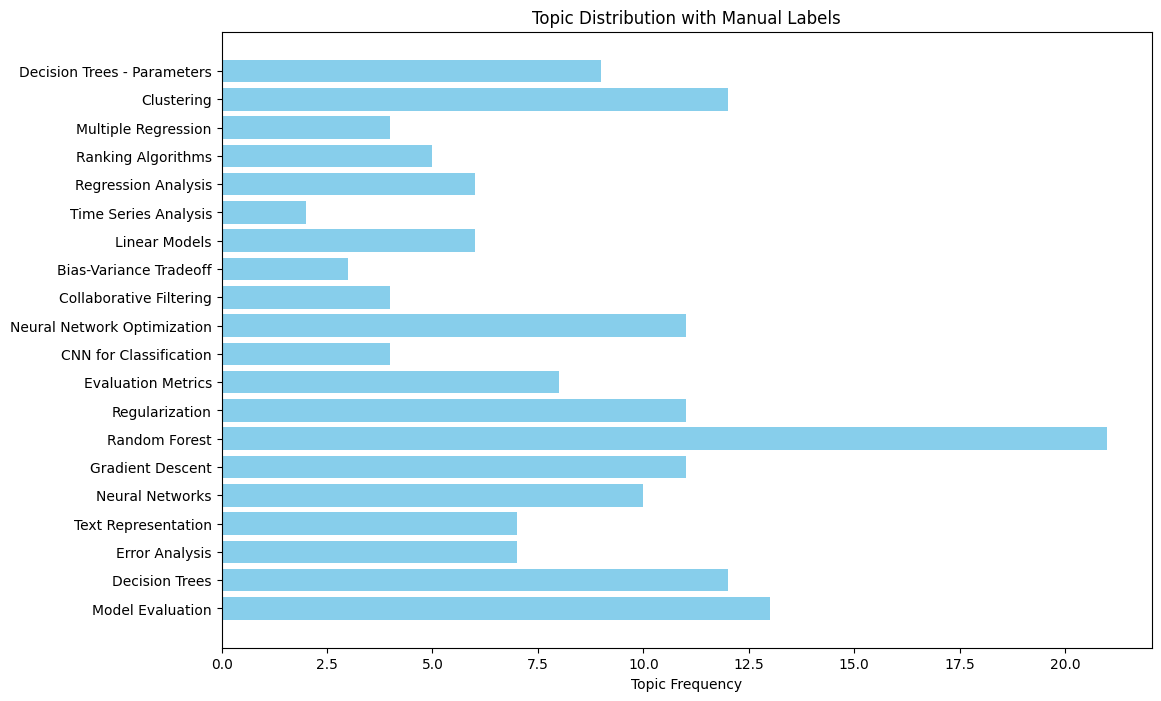

In [ ]:
labels = [
    "Decision Trees", "Error Analysis", "Text Representation", "Neural Networks",
    "Gradient Descent", "Random Forest", "Regularization", "Evaluation Metrics",
    "CNN for Classification", "Neural Network Optimization", "Collaborative Filtering",
    "Bias-Variance Tradeoff", "Linear Models", "Time Series Analysis", "Regression Analysis",
    "Ranking Algorithms", "Multiple Regression", "Clustering", "Decision Trees - Parameters",
    "Model Evaluation"
]

df = pd.DataFrame({
    'Topic': data['Topic'].unique(),
    'Label': [labels[i-1] for i in sorted(data['Topic'].unique())],
    'Count': data['Topic'].value_counts().sort_index()
})

plt.figure(figsize=(12, 8))
plt.barh(df['Label'], df['Count'], color='skyblue')
plt.xlabel('Topic Frequency')
plt.title('Topic Distribution with Manual Labels')
plt.show()



In [ ]:
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtm)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(dtm, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'K={k}, Silhouette Score: {score:.3f}')

optimal_k = 20
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(dtm)

data['cluster'] = clusters

def get_top_terms_per_cluster(kmeans, feature_names, n_terms=10):
    terms_per_cluster = []
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

    for i in range(kmeans.n_clusters):
        top_terms = [feature_names[ind] for ind in order_centroids[i, :n_terms]]
        terms_per_cluster.append(top_terms)
    return terms_per_cluster

feature_names = tfidf.get_feature_names_out()
top_terms = get_top_terms_per_cluster(kmeans, feature_names)

for i, terms in enumerate(top_terms):
    print(f'\nCluster {i}: ')
    print(', '.join(terms))

print("\nCluster büyüklükleri:")
print(pd.Series(clusters).value_counts().sort_index())

K=2, Silhouette Score: 0.014
K=3, Silhouette Score: 0.020
K=4, Silhouette Score: 0.020
K=5, Silhouette Score: 0.030
K=6, Silhouette Score: 0.028
K=7, Silhouette Score: 0.036
K=8, Silhouette Score: 0.041
K=9, Silhouette Score: 0.044
K=10, Silhouette Score: 0.053

Cluster 0: 
categorical, variable, node, hot, decision, tree, label, target, encoder, train

Cluster 1: 
learning, rate, minimum, start, parameter, small, pattern, label, min, far

Cluster 2: 
ranking, answer, algorithm, data, use, training, evaluation, evaluate, new, solve

Cluster 3: 
error, series, time, regression, feature, model, variable, linear, trend, square

Cluster 4: 
positive, roc, curve, recall, precision, false, auc, true, au, negative

Cluster 5: 
function, activation, sigmoid, problem, value, classification, solve, learn, layer, vanishing

Cluster 6: 
regularization, feature, selection, coefficient, model, technique, component, linear, analysis, sum

Cluster 7: 
text, neural, net, answer, cnn, classification, go

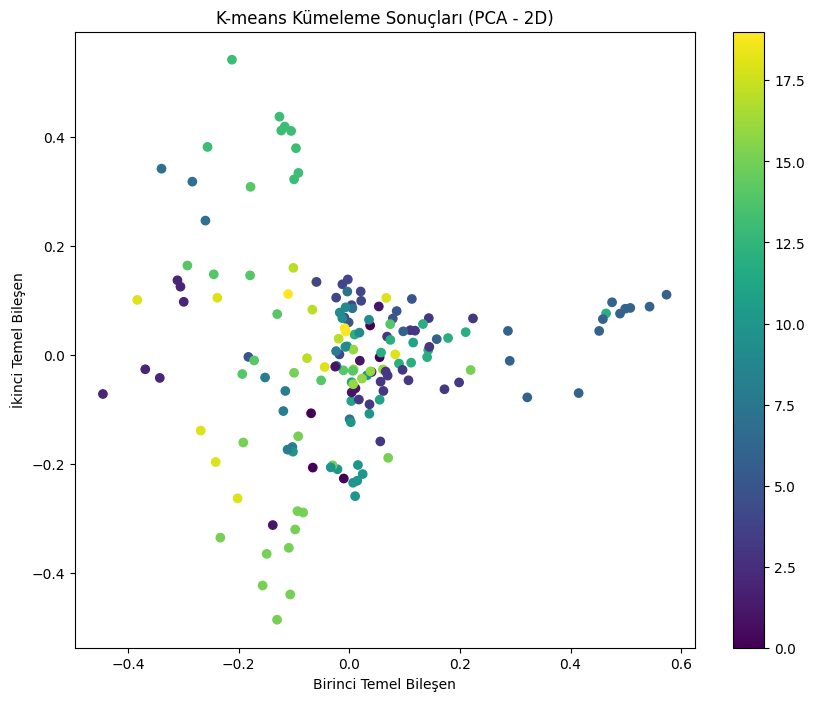

In [ ]:
pca = PCA(n_components=2)
coords_2d = pca.fit_transform(dtm.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(coords_2d[:, 0], coords_2d[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('K-means Kümeleme Sonuçları (PCA - 2D)')
plt.xlabel('Birinci Temel Bileşen')
plt.ylabel('İkinci Temel Bileşen')
plt.show()

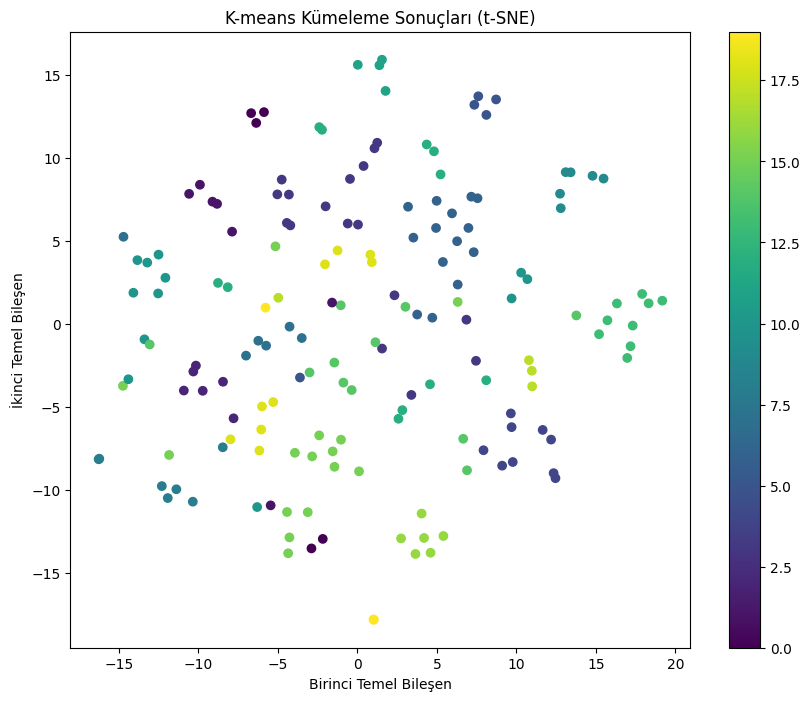

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
coords_tsne = tsne_model.fit_transform(dtm.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.title('K-means Kümeleme Sonuçları (t-SNE)')
plt.xlabel('Birinci Temel Bileşen')
plt.ylabel('İkinci Temel Bileşen')
plt.show()

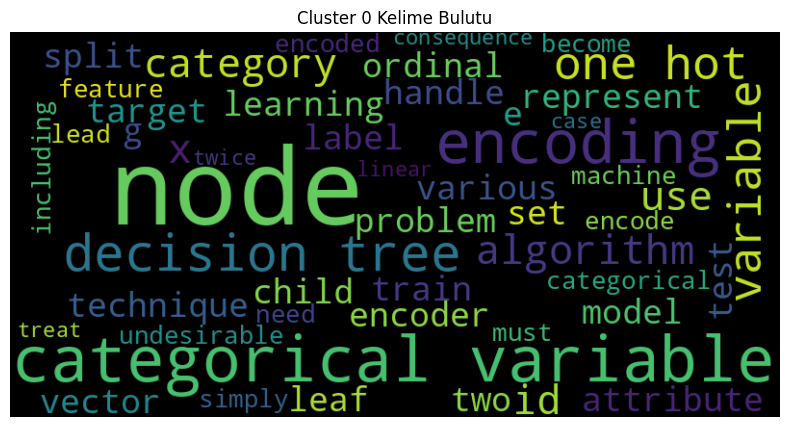

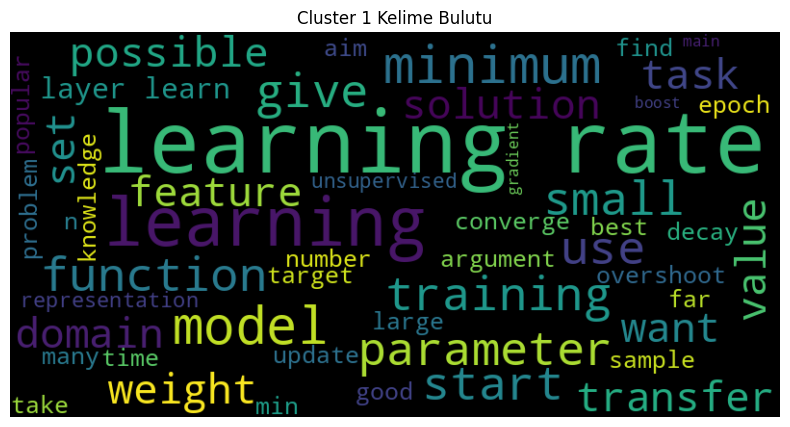

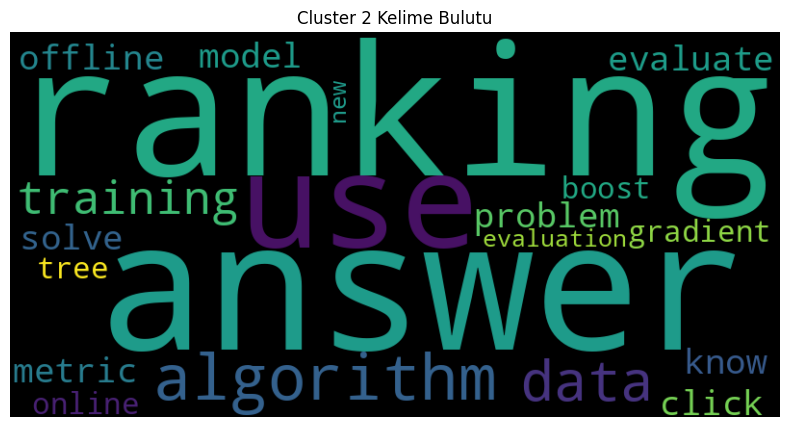

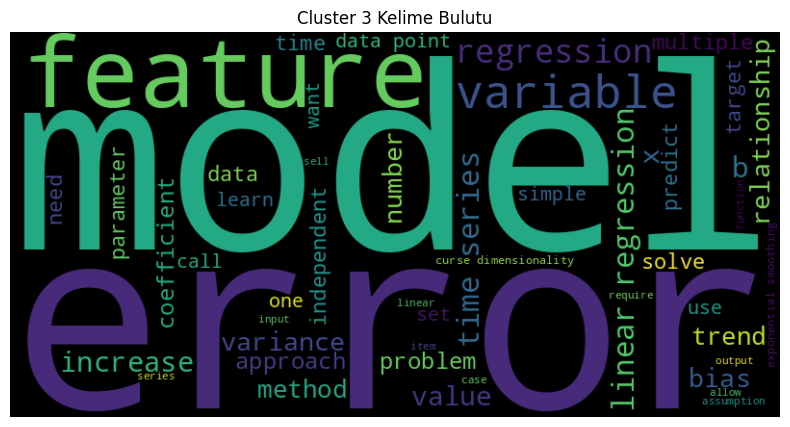

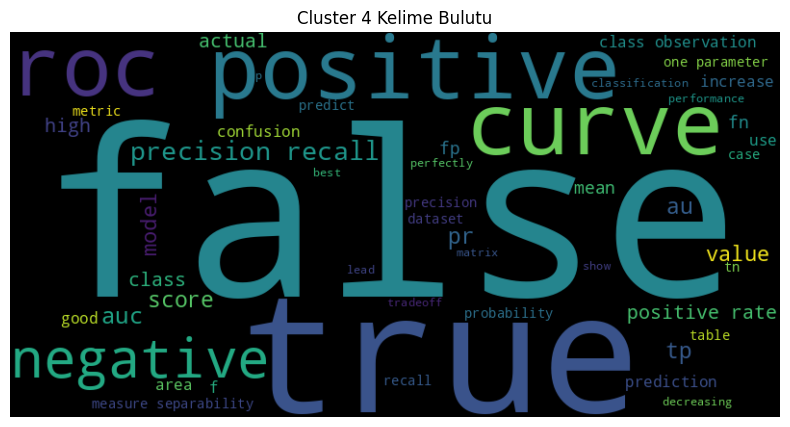

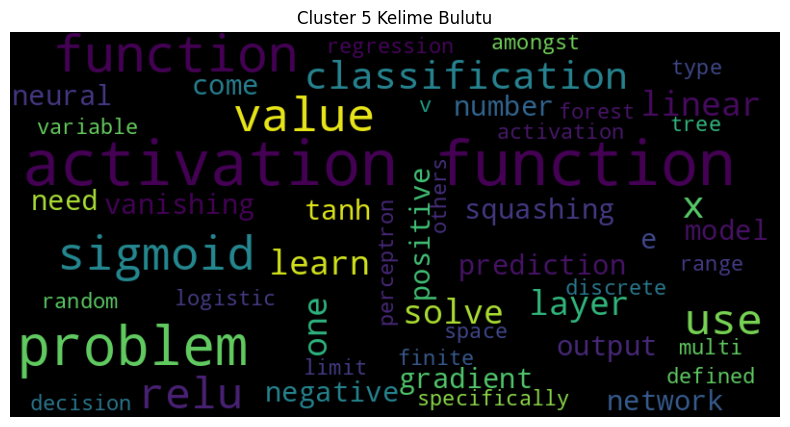

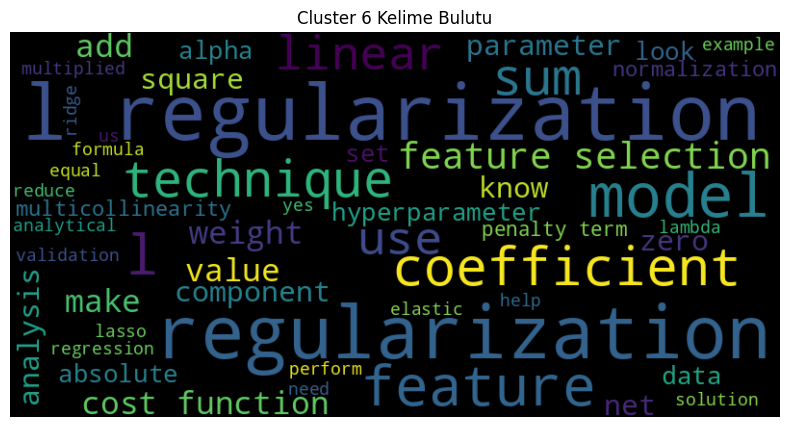

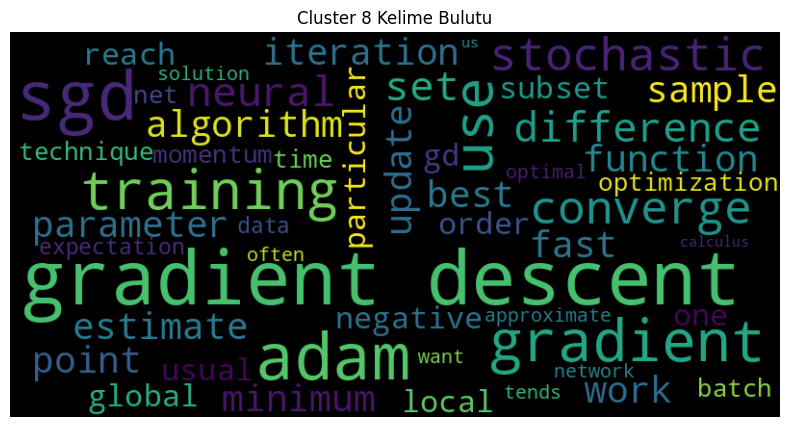

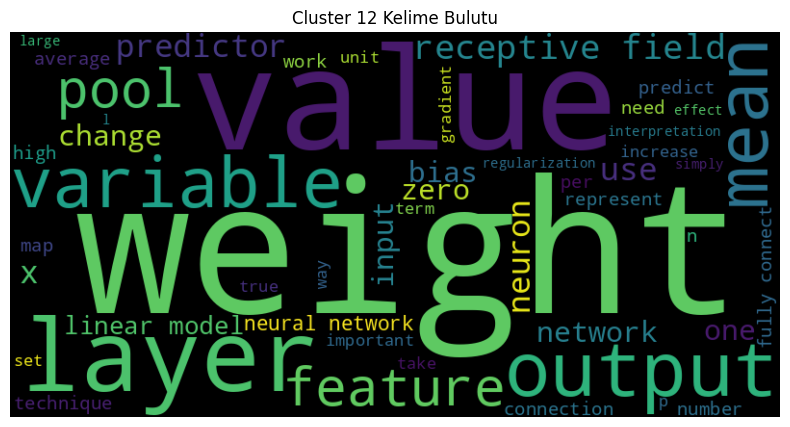

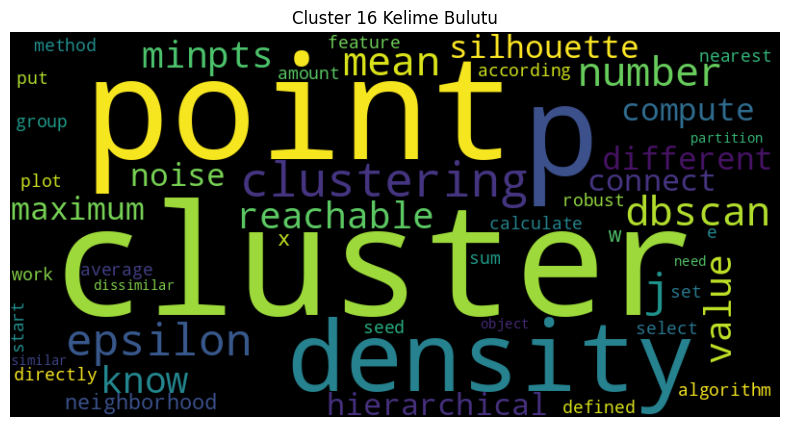

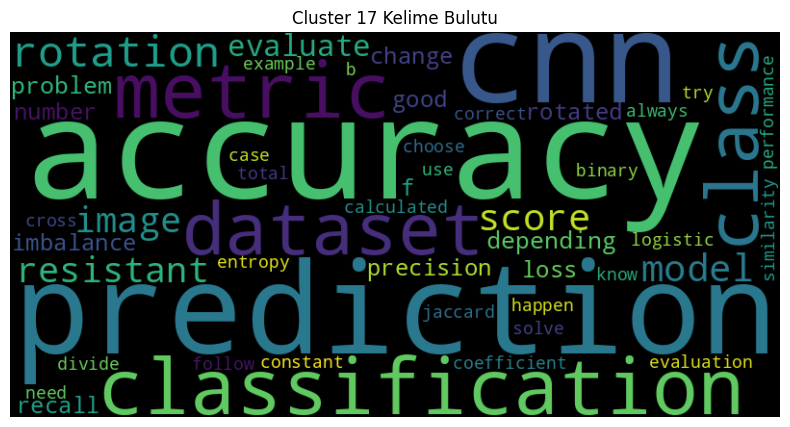

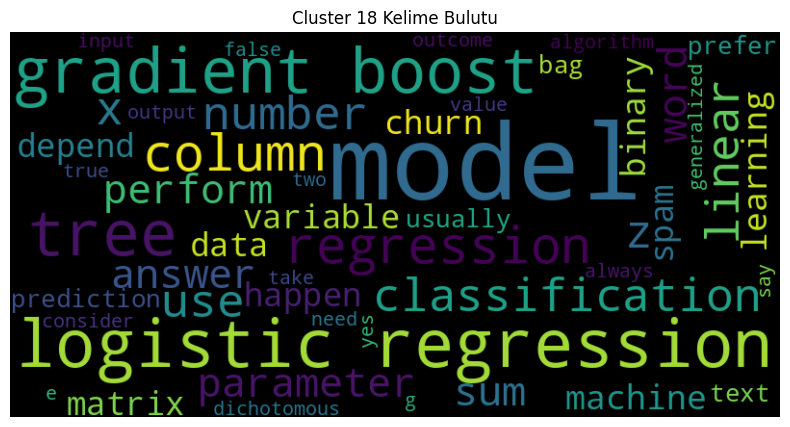

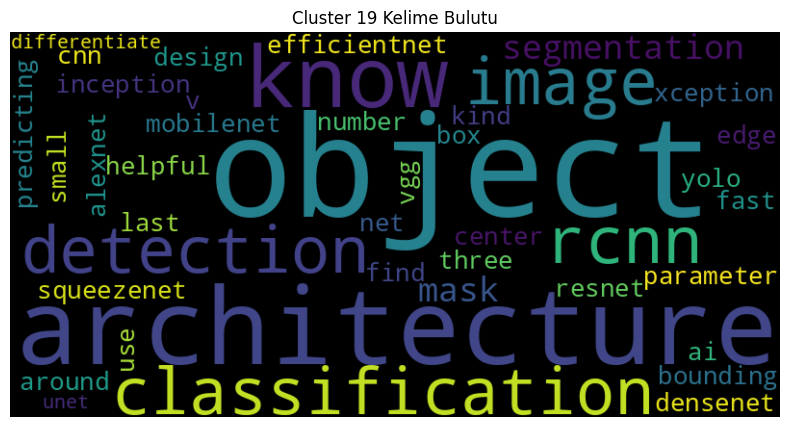

In [ ]:
def generate_wordcloud_for_cluster(cluster_id):
    text = ' '.join(data[clusters == cluster_id]['lemmatize_text'])

    wordcloud = WordCloud(width=800, height=400,
                         max_words=50).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_id} Kelime Bulutu')
    plt.show()

for i in range(max(clusters) + 1):
    generate_wordcloud_for_cluster(i)

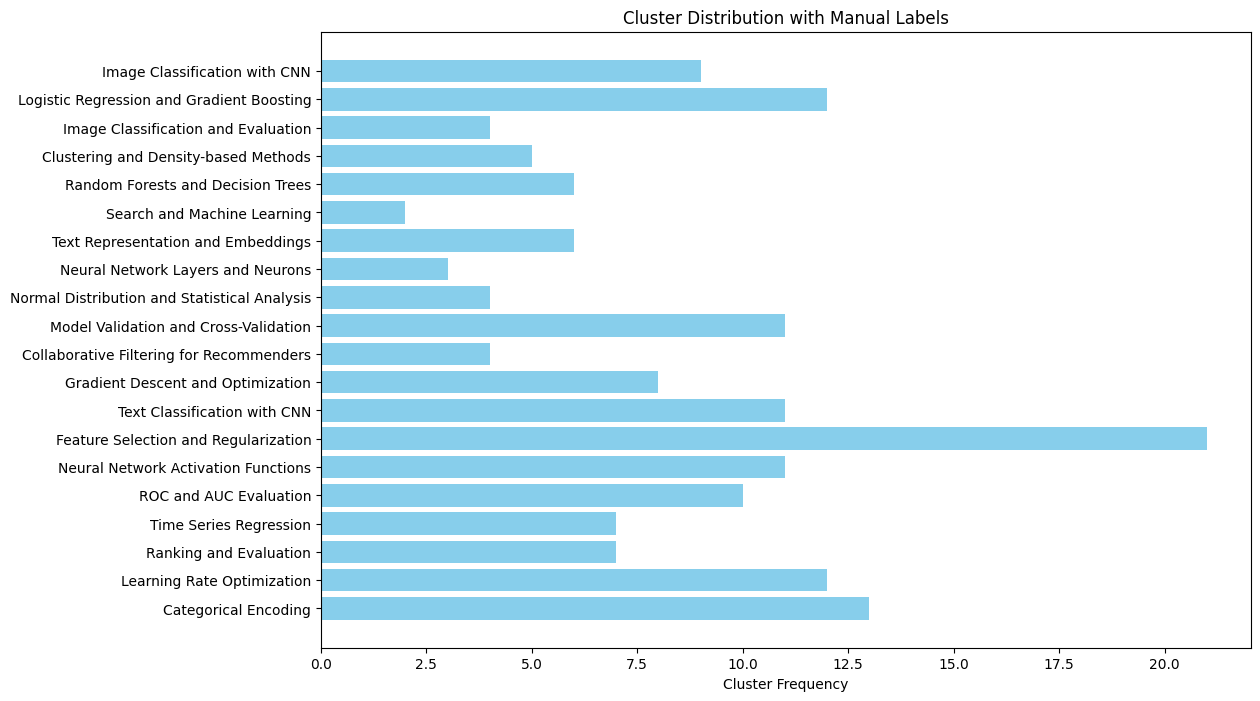

In [ ]:
labels = [
    "Categorical Encoding", "Learning Rate Optimization", "Ranking and Evaluation",
    "Time Series Regression", "ROC and AUC Evaluation", "Neural Network Activation Functions",
    "Feature Selection and Regularization", "Text Classification with CNN", "Gradient Descent and Optimization",
    "Collaborative Filtering for Recommenders", "Model Validation and Cross-Validation",
    "Normal Distribution and Statistical Analysis", "Neural Network Layers and Neurons",
    "Text Representation and Embeddings", "Search and Machine Learning", "Random Forests and Decision Trees",
    "Clustering and Density-based Methods", "Image Classification and Evaluation",
    "Logistic Regression and Gradient Boosting", "Image Classification with CNN"
]

df = pd.DataFrame({
    'Cluster': data['cluster'].unique(),
    'Label': [labels[i] for i in sorted(data['cluster'].unique())],
    'Count': data['Topic'].value_counts().sort_index()
})

plt.figure(figsize=(12, 8))
plt.barh(df['Label'], df['Count'], color='skyblue')
plt.xlabel('Cluster Frequency')
plt.title('Cluster Distribution with Manual Labels')
plt.show()